In [1]:
# Przykład regresji liniowej z jedną niewiadomą

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mateuszr/ml-course-1/main/datasets/advertising.csv')

In [4]:
# Alternatywny sposób wczytania danych (po uprzednim wrzuceniu pliku na dysk Google Drive do katalogu "Data")

#!cp /content/drive/MyDrive/Data/advertising.csv /content/
#df = pd.read_csv('advertising.csv')

Text(0.5, 1.0, 'Sales vs TV')

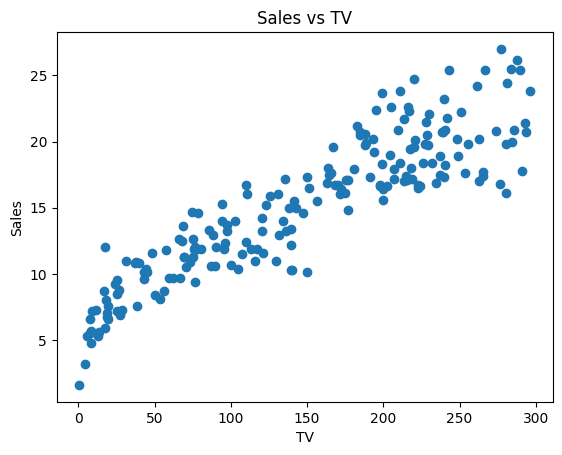

In [5]:
# Wykres punktowy dla wynikow sprzedazy ("Sales") w zależności od nakładu na reklamę w TV

plot.scatter(df["TV"], df["Sales"])
plot.xlabel("TV")
plot.ylabel("Sales")
plot.title("Sales vs TV")

In [6]:
# Przypisujemy do zmiennej X (niezależnej) wartości z kolumny "TV"
# a do zmiennej y (zależnej) wartości z kolumny "Sales"

X_train = df["TV"].values
y_train = df["Sales"].values

In [7]:
# Model regresji liniowej

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [8]:
# Poniewaz uzywamy jako zmiennej niezaleznej X tylko jednej kolumny danych, musimy uzyc funkcji reshape: X.reshape(-1, 1) aby zamienic nasz wektor o dlugosci 200 w macierz 200x1
# przyklad:
print(X_train.shape) # rozmiar wektora
print(X_train.reshape(-1, 1).shape) # rozmiar macierzy

(200,)
(200, 1)


In [9]:
# Podgląd zmiennej X_train po zamianie w macierz.

X_train.reshape(-1,1)

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [10]:
# Walidacja modelu: Metryka R2

r_squared = model.score(X_train.reshape(-1, 1), y_train)
print("R2:", r_squared)

R2: 0.8121757029987414


In [11]:
# Niestety z samego modelu otrzymanego przez funkcje LinearRegression() nie otrzymamy wartosci p-value ani odchylenia standarodwego.
# Mozemy natomiast otrzymac je wykorzystujac funkcje OLS (Ordinary Least Squares), która jest tożsama z naszą regresją liniową.

import statsmodels.api as sm
from scipy import stats

X_train = df["TV"]
y_train = df["Sales"]

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
regression_model = est.fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 22 May 2023   Prob (F-statistic):           7.93e-74
Time:                        00:48:22   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [12]:
# W jaki sposob "przewidywac" nowe wartosci Y na podstawie X?
# przyklad predykcji dla wartosci 150, 200, 1000
predict = [150, 200, 1000]

x_test = pd.array(predict).reshape(-1, 1)

y_pred = model.predict(x_test)

y_pred

array([15.294537058663721, 18.067775582141664, 62.439591957788764],
      dtype=object)

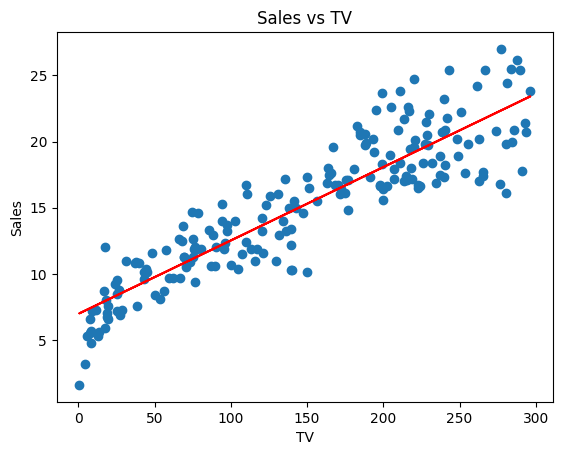

In [13]:
# Wykres punktowy (scatterplot)

plot.scatter(df["TV"], df["Sales"])
plot.xlabel("TV")
plot.ylabel("Sales")
plot.title("Sales vs TV")

# naniesienie regresji liniowej
plot.plot(X_train, model.predict(X_train.values.reshape(-1, 1)), color='red')